# Importing the libs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Reading the Data

In [3]:
credit_cost = pd.read_excel('credit_cost.xlsx', engine='openpyxl')

In [4]:
credit_concession = pd.read_excel('credit_concession.xlsx', engine='openpyxl')

In [25]:
selic = pd.read_excel('selic.xls.xlsx', engine='openpyxl')

In [26]:
ipca = pd.read_excel('ipca.xlsx', engine='openpyxl')

## PreProcess

In [5]:
credit_cost.head()

,DateTime,Indicador de custo do crédito
0,2013-01-01,19.94
1,2013-02-01,19.98
2,2013-03-01,19.73
3,2013-04-01,19.56
4,2013-05-01,19.29


In [14]:
credit_cost.columns.values

array(['DateTime', 'Indicador de custo do crédito'], dtype=object)

In [6]:
credit_cost.isnull().sum()

DateTime                         0
Indicador de custo do crédito    0
dtype: int64

In [7]:
credit_concession.head()

,DateTime,PJ total,PF não rotativo
0,2013-02-01,7.56,3.80
1,2013-03-01,6.14,4.17
2,2013-04-01,5.62,5.62
3,2013-05-01,5.00,5.22
4,2013-06-01,4.28,4.59


In [12]:
credit_concession.columns.values

array(['DateTime', 'PJ total', 'PF não rotativo'], dtype=object)

In [8]:
credit_concession.isnull().sum()

DateTime           0
PJ total           0
PF não rotativo    0
dtype: int64

In [27]:
selic.head()

,DateTime,Selic
0,2013-11-04,9.5
1,2013-11-05,9.5
2,2013-11-06,9.5
3,2013-11-07,9.5
4,2013-11-08,9.5


In [28]:
selic.columns.values

array(['DateTime', 'Selic'], dtype=object)

In [29]:
selic.isnull().sum()

DateTime    0
Selic       0
dtype: int64

In [30]:
ipca.head()

,DateTime,meta para a inflação,IPCA ocorrido,Focus mais recente,limite máximo,limite mínino
0,2013-01-01,4.5,6.15,NaN,6.5,2.5
1,2013-02-01,NaN,6.31,NaN,NaN,NaN
2,2013-03-01,NaN,6.59,NaN,NaN,NaN
3,2013-04-01,NaN,6.49,NaN,NaN,NaN
4,2013-05-01,NaN,6.50,NaN,NaN,NaN


In [32]:
ipca.columns.values

array(['DateTime', 'meta para a inflação', 'IPCA ocorrido',
       'Focus mais recente', 'limite máximo', 'limite mínino'],
      dtype=object)

In [33]:
ipca.isnull().sum()

DateTime                  0
meta para a inflação    119
IPCA ocorrido             1
Focus mais recente      128
limite máximo           119
limite mínino           119
dtype: int64

## Cleaning the Data

In [34]:
ipca_remove_columns = ['meta para a inflação', 'Focus mais recente', 'limite máximo', 'limite mínino']
ipca_removed_columns = ipca.drop(ipca_remove_columns, axis=1)
ipca_removed_columns.head()

,DateTime,IPCA ocorrido
0,2013-01-01,6.15
1,2013-02-01,6.31
2,2013-03-01,6.59
3,2013-04-01,6.49
4,2013-05-01,6.50


## Merging the data

In [16]:
credit_concession_credit_cost_merged = pd.merge(credit_cost, credit_concession, on='DateTime')
credit_concession_credit_cost_merged.head()

,DateTime,Indicador de custo do crédito,PJ total,PF não rotativo
0,2013-02-01,19.98,7.56,3.80
1,2013-03-01,19.73,6.14,4.17
2,2013-04-01,19.56,5.62,5.62
3,2013-05-01,19.29,5.00,5.22
4,2013-06-01,19.15,4.28,4.59


In [37]:
credit_cost_ipca = pd.merge(credit_cost, ipca_removed_columns, on='DateTime')
credit_cost_ipca.head()

,DateTime,Indicador de custo do crédito,IPCA ocorrido
0,2013-01-01,19.94,6.15
1,2013-02-01,19.98,6.31
2,2013-03-01,19.73,6.59
3,2013-04-01,19.56,6.49
4,2013-05-01,19.29,6.50


In [38]:
credit_cost_ipca_selic = pd.merge(credit_cost_ipca, selic, on='DateTime')
credit_cost_ipca.head()

,DateTime,Indicador de custo do crédito,IPCA ocorrido
0,2013-01-01,19.94,6.15
1,2013-02-01,19.98,6.31
2,2013-03-01,19.73,6.59
3,2013-04-01,19.56,6.49
4,2013-05-01,19.29,6.50


## Plotting the Graphs

### Individual Graphs

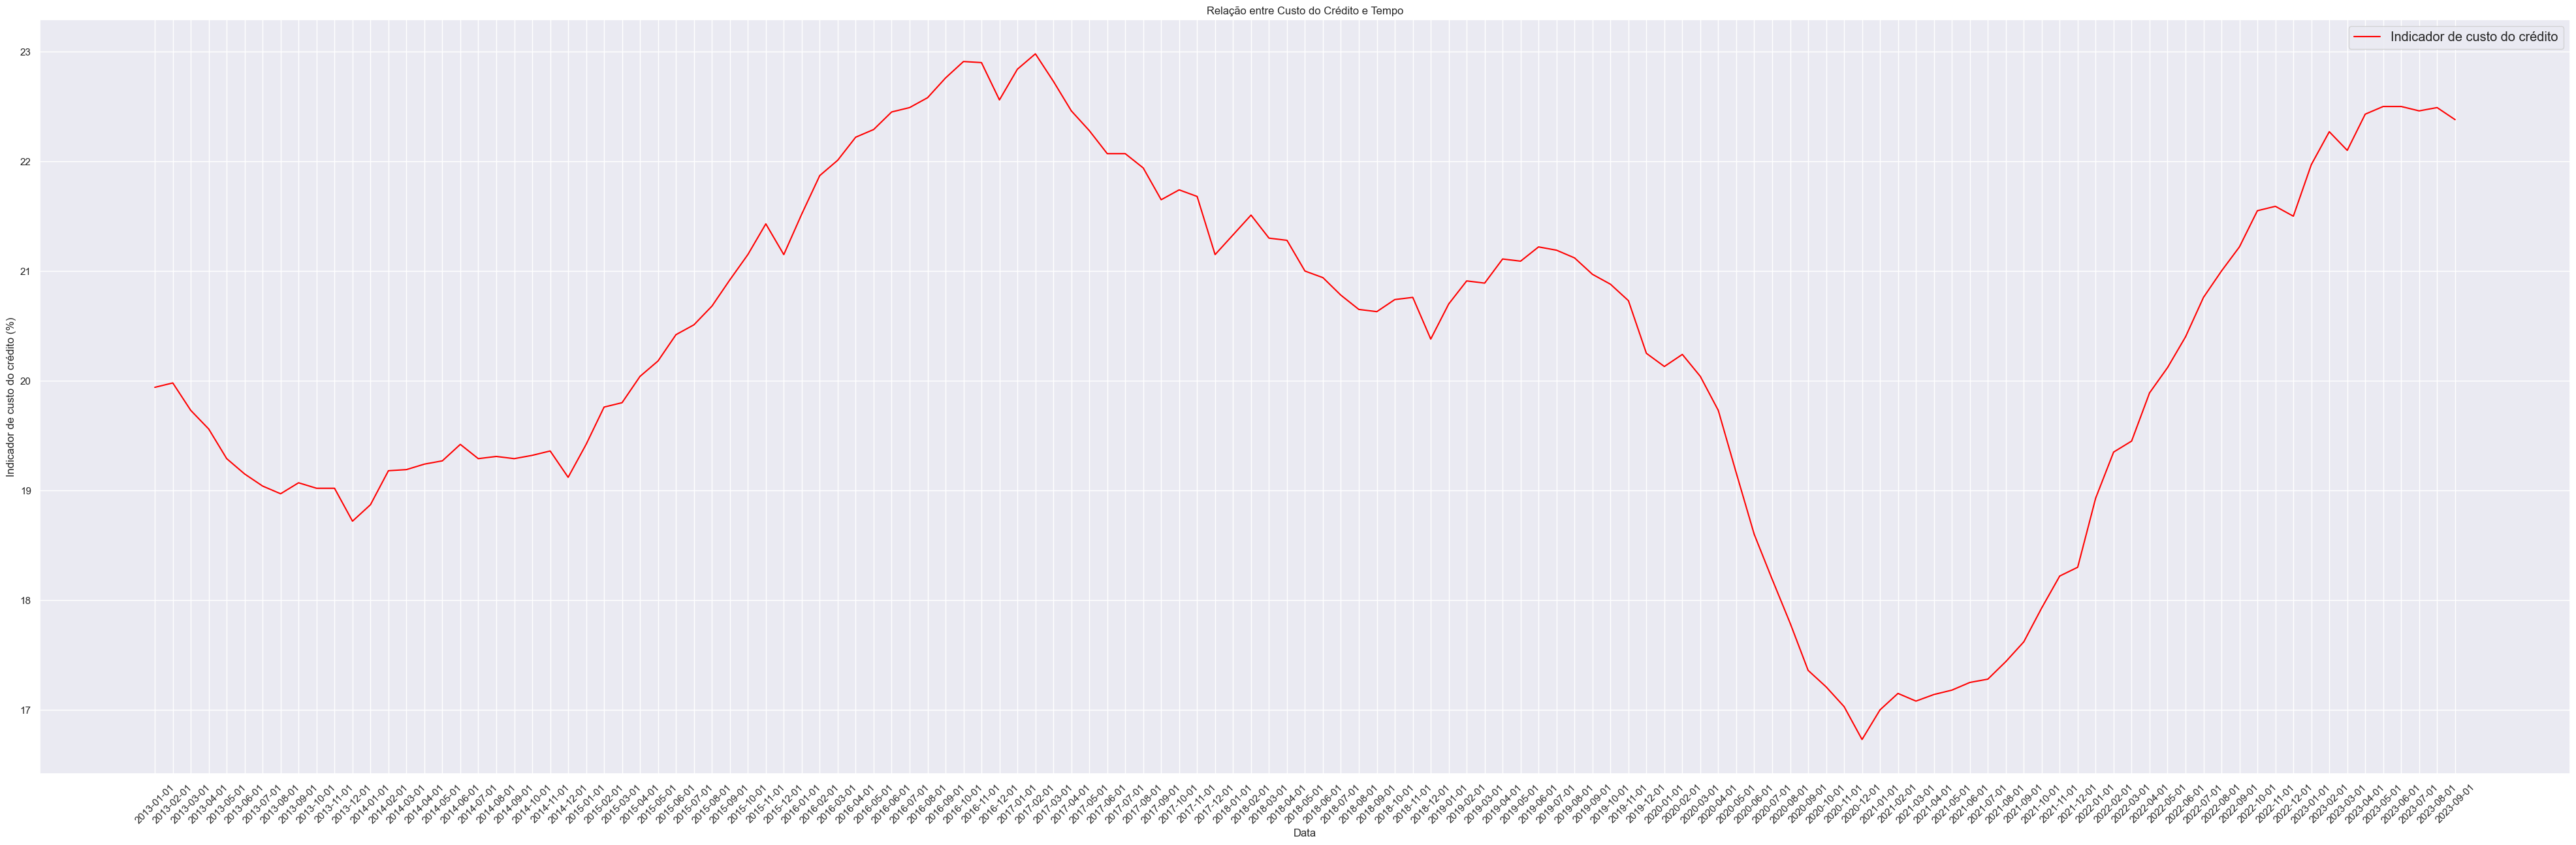

In [19]:
# Define o estilo do gráfico
sns.set(style="darkgrid")

# Cria o gráfico de linha
plt.figure(figsize=(50, 15))

# Plotar a Atividade Econômica
sns.lineplot(x=credit_cost['DateTime'], y=credit_cost['Indicador de custo do crédito'], label='Indicador de custo do crédito', color='red')
plt.xticks(rotation=45)

# Adiciona título e rótulos dos eixos
plt.title('Relação entre Custo do Crédito e Tempo')
plt.xlabel('Data')
plt.ylabel('Indicador de custo do crédito (%)')

# Adiciona legenda
plt.legend(fontsize='large')

# Exibe o gráfico
plt.show()

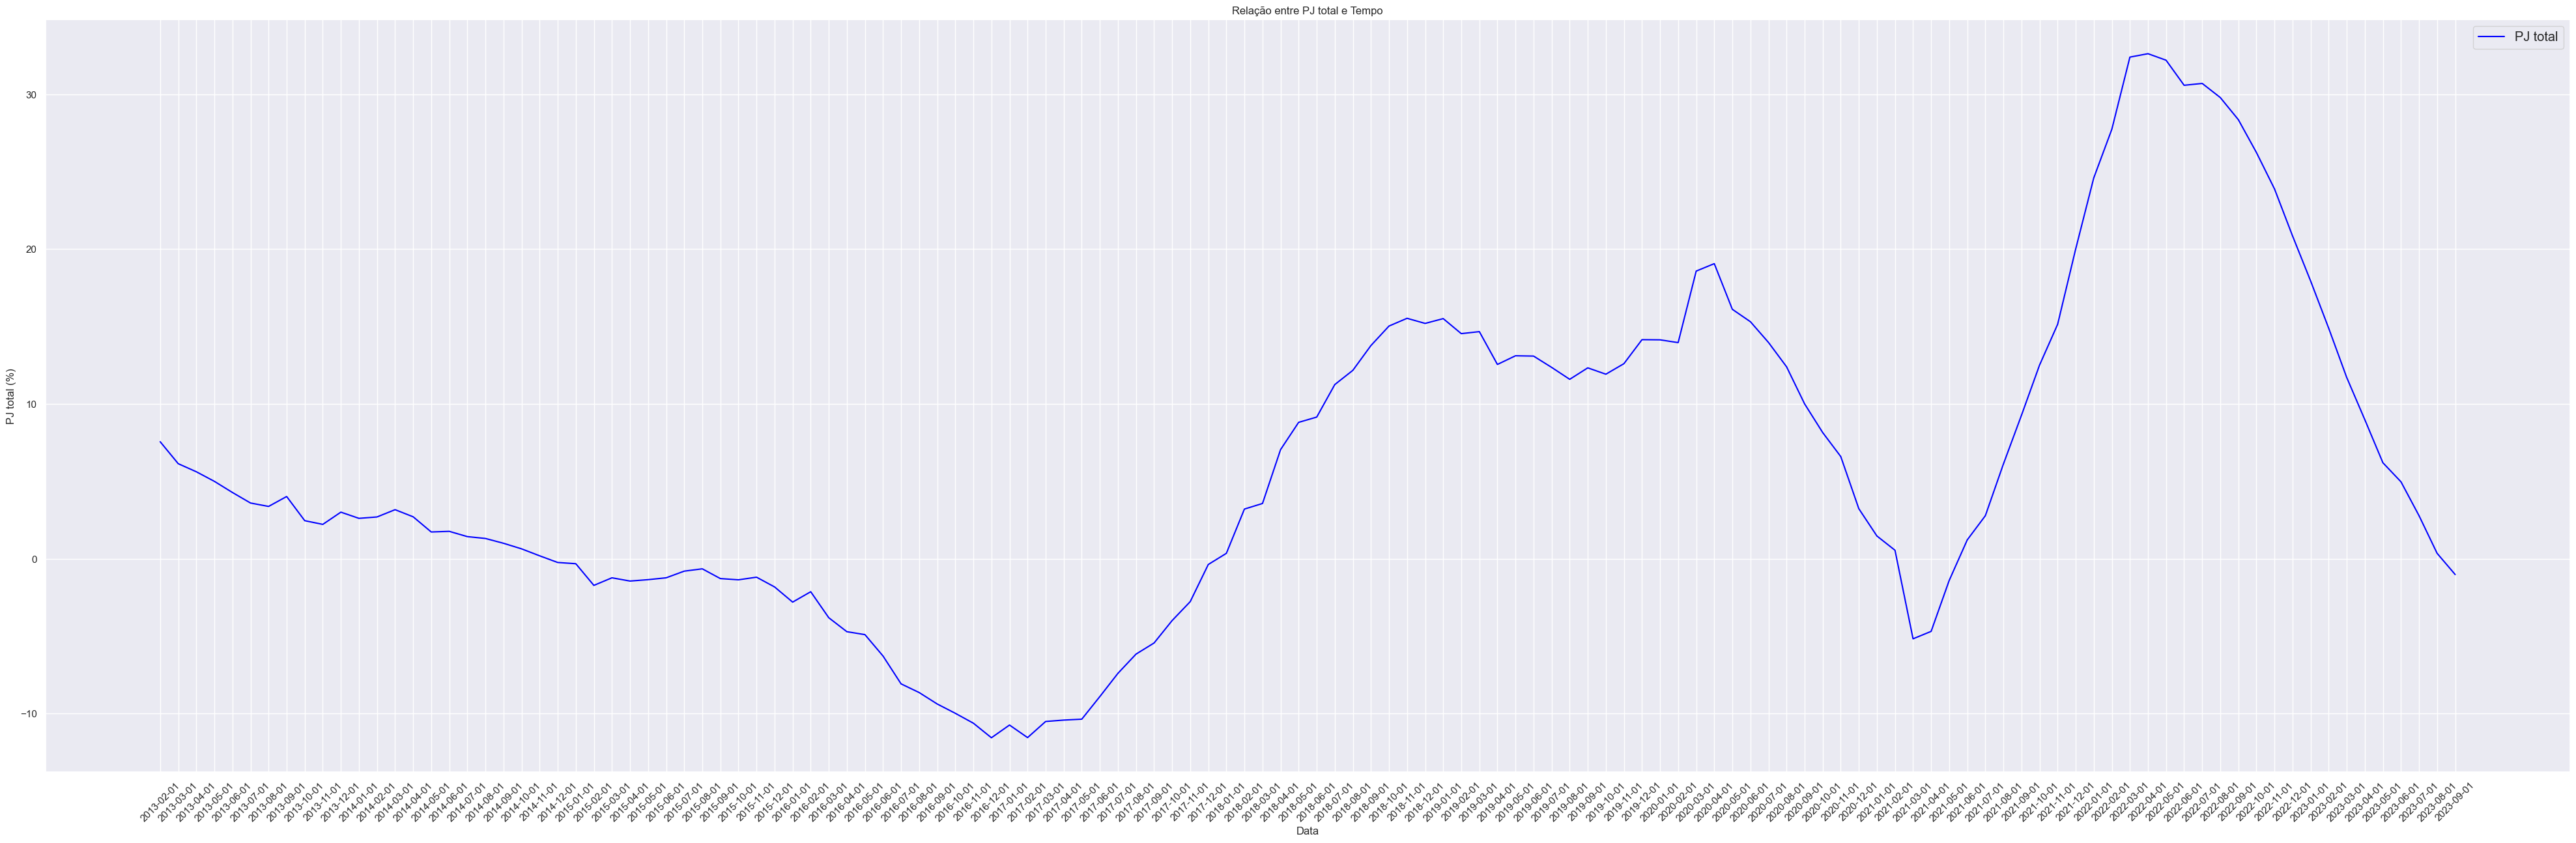

In [20]:
# Define o estilo do gráfico
sns.set(style="darkgrid")

# Cria o gráfico de linha
plt.figure(figsize=(50, 15))

# Plotar a Atividade Econômica
sns.lineplot(x=credit_concession['DateTime'], y=credit_concession['PJ total'], label='PJ total', color='blue')
plt.xticks(rotation=45)

# Adiciona título e rótulos dos eixos
plt.title('Relação entre PJ total e Tempo')
plt.xlabel('Data')
plt.ylabel('PJ total (%)')

# Adiciona legenda
plt.legend(fontsize='large')

# Exibe o gráfico
plt.show()

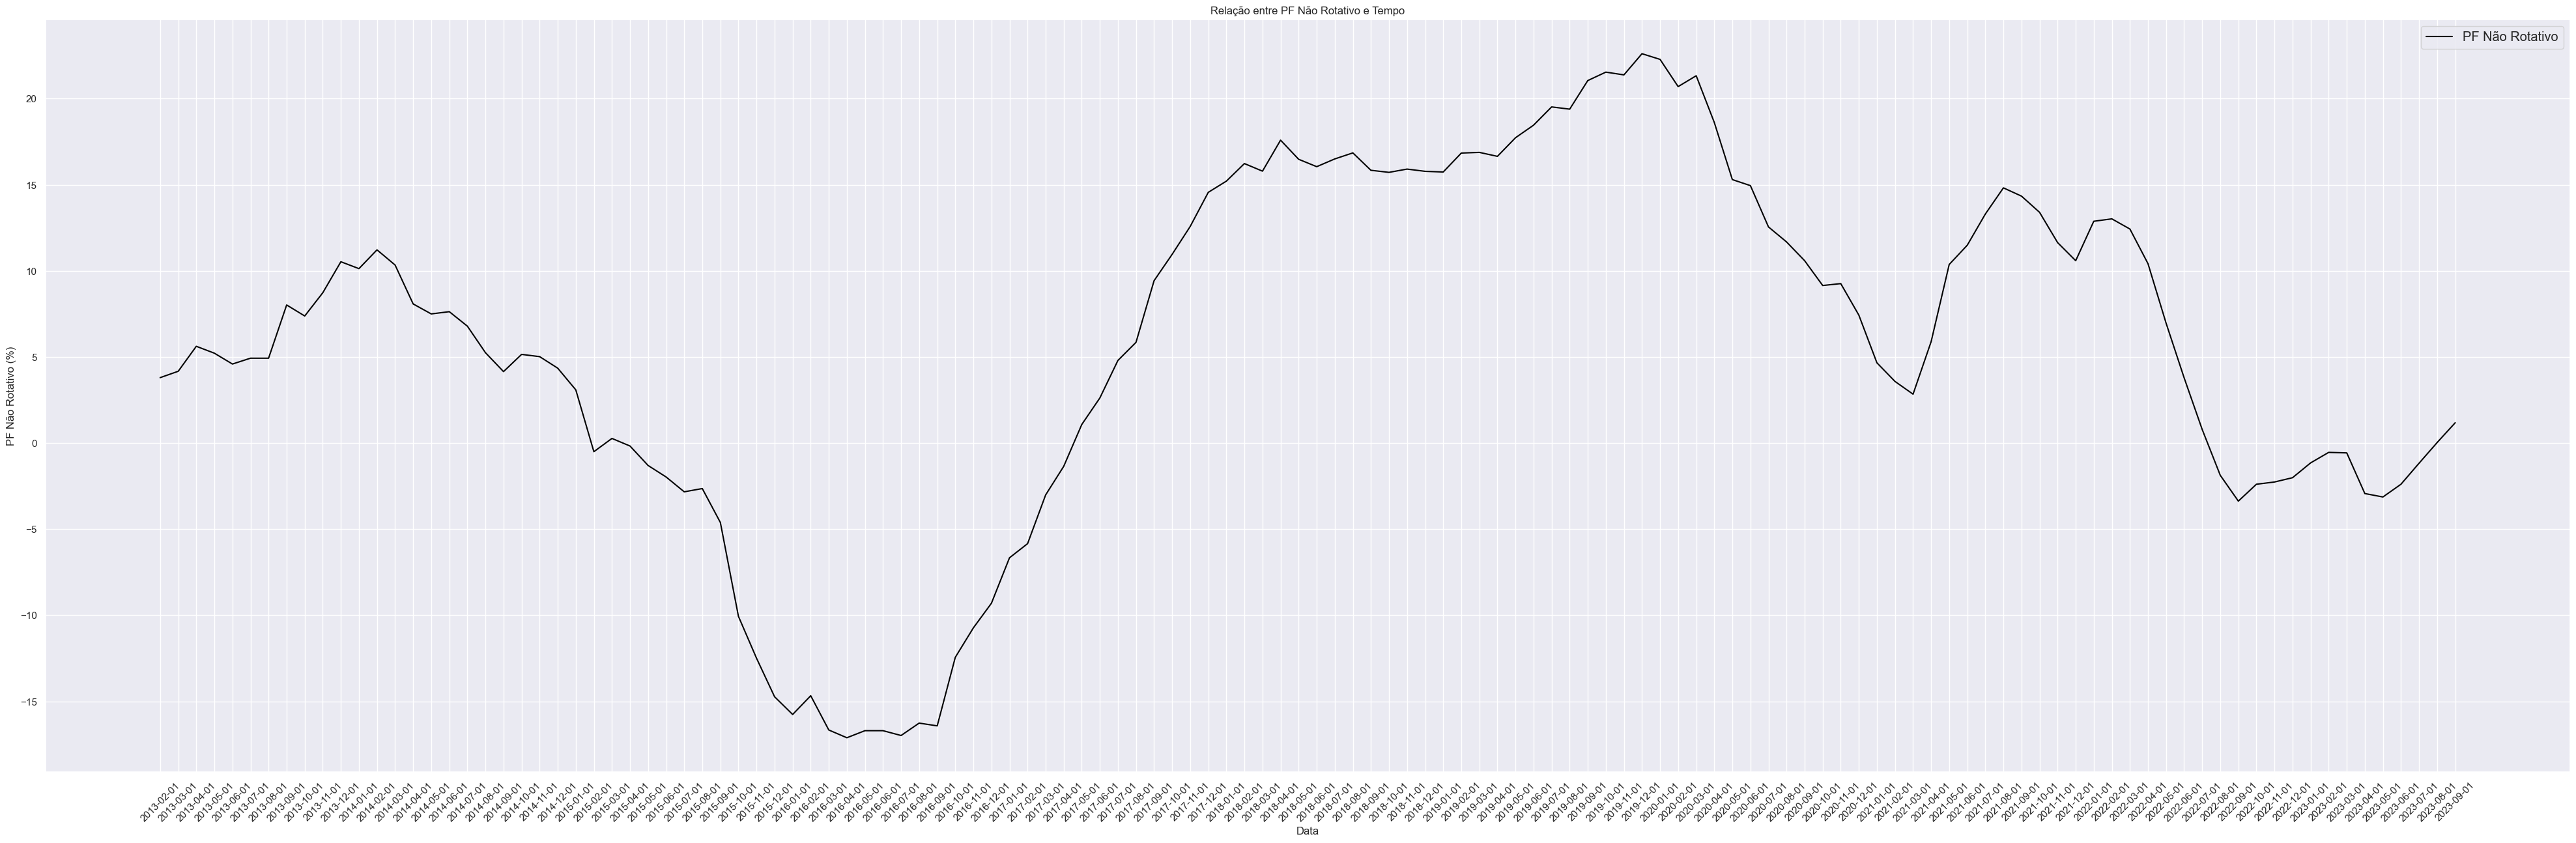

In [22]:
# Define o estilo do gráfico
sns.set(style="darkgrid")

# Cria o gráfico de linha
plt.figure(figsize=(50, 15))

# Plotar a Atividade Econômica
sns.lineplot(x=credit_concession['DateTime'], y=credit_concession['PF não rotativo'], label='PF Não Rotativo', color='black')
plt.xticks(rotation=45)

# Adiciona título e rótulos dos eixos
plt.title('Relação entre PF Não Rotativo e Tempo')
plt.xlabel('Data')
plt.ylabel('PF Não Rotativo (%)')

# Adiciona legenda
plt.legend(fontsize='large')

# Exibe o gráfico
plt.show()

### Grouped Parameters Graphs

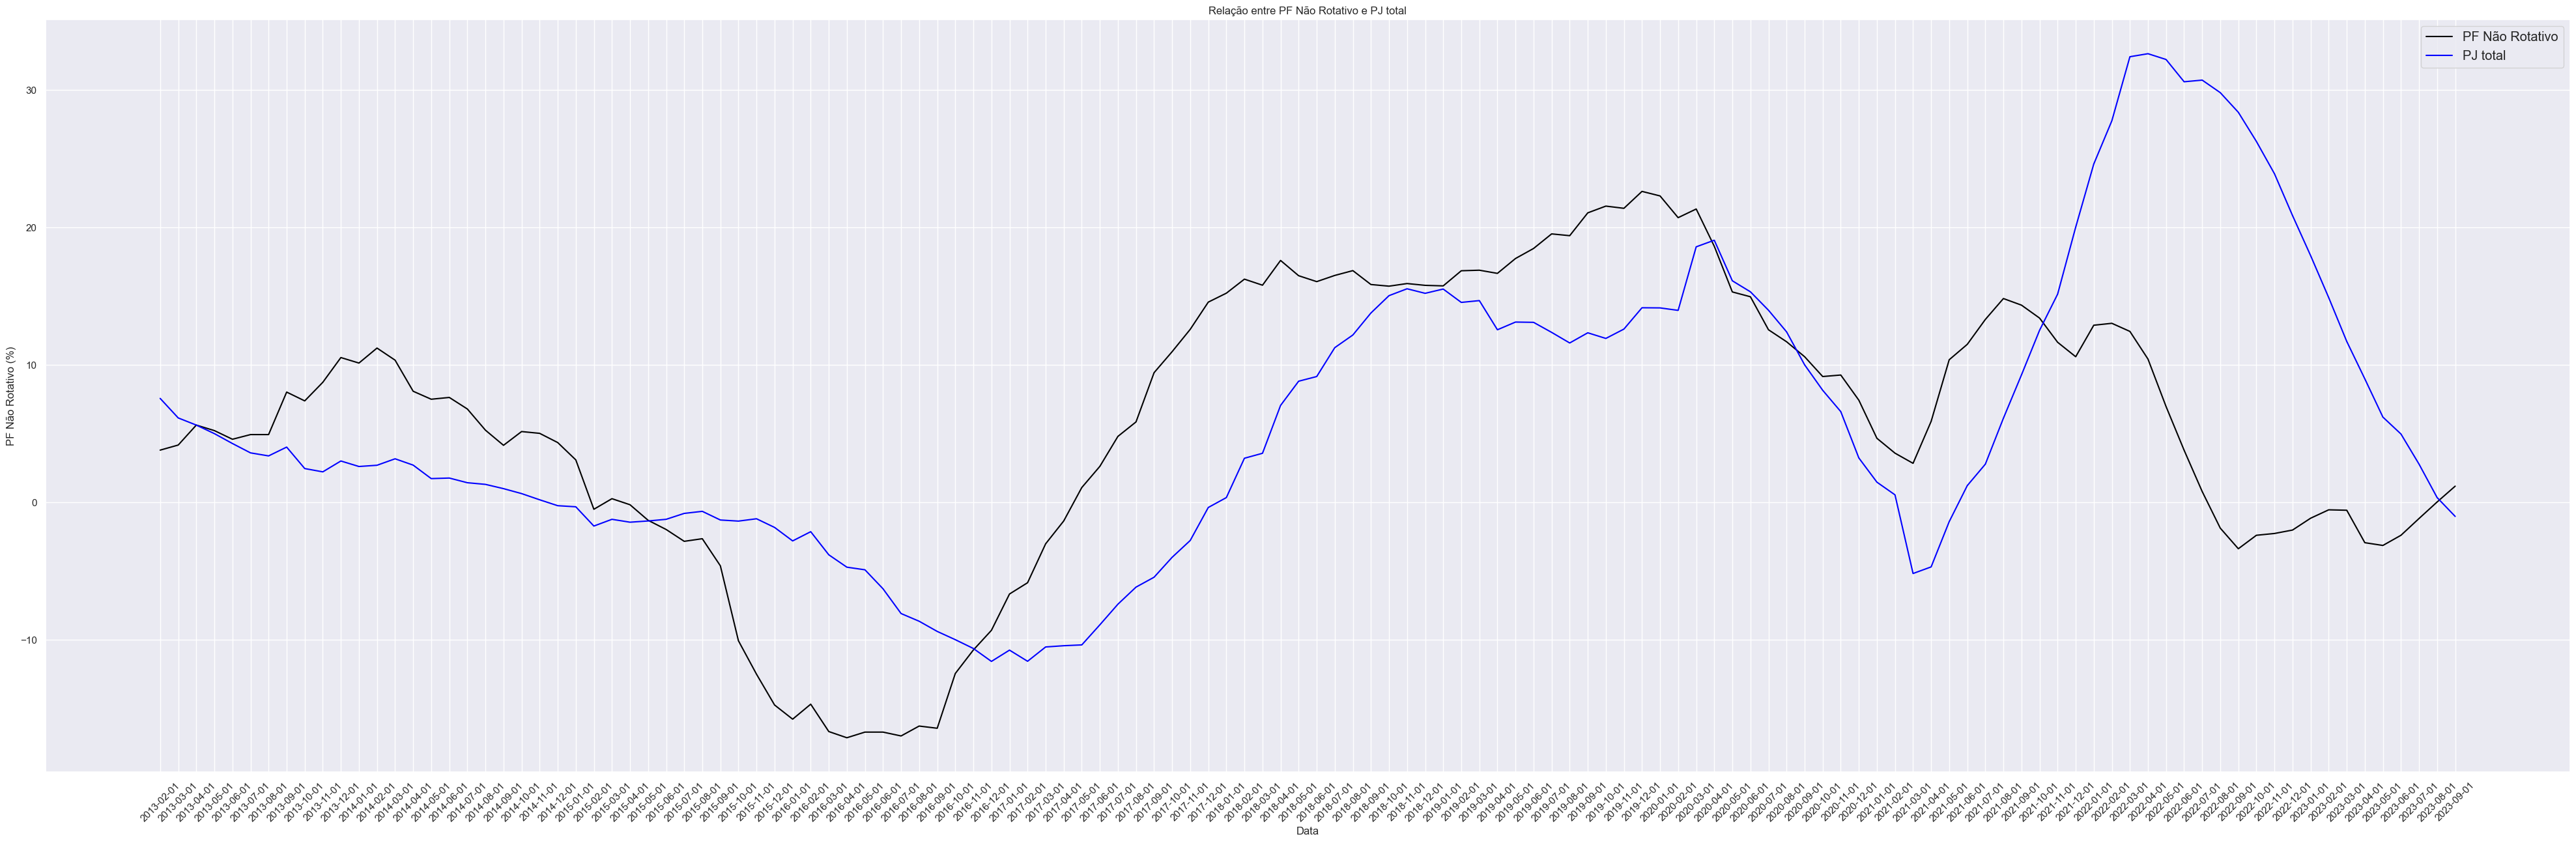

In [23]:
# Define o estilo do gráfico
sns.set(style="darkgrid")

# Cria o gráfico de linha
plt.figure(figsize=(50, 15))

# Plotar a Concessão de crédito PF
sns.lineplot(x=credit_concession['DateTime'], y=credit_concession['PF não rotativo'], label='PF Não Rotativo', color='black')

# Plotar a concessão de crédito PJ
sns.lineplot(x=credit_concession['DateTime'], y=credit_concession['PJ total'], label='PJ total', color='blue')
plt.xticks(rotation=45)

# Adiciona título e rótulos dos eixos
plt.title('Relação entre PF Não Rotativo e PJ total')
plt.xlabel('Data')
plt.ylabel('PF Não Rotativo (%)')

# Adiciona legenda
plt.legend(fontsize='large')

# Exibe o gráfico
plt.show()

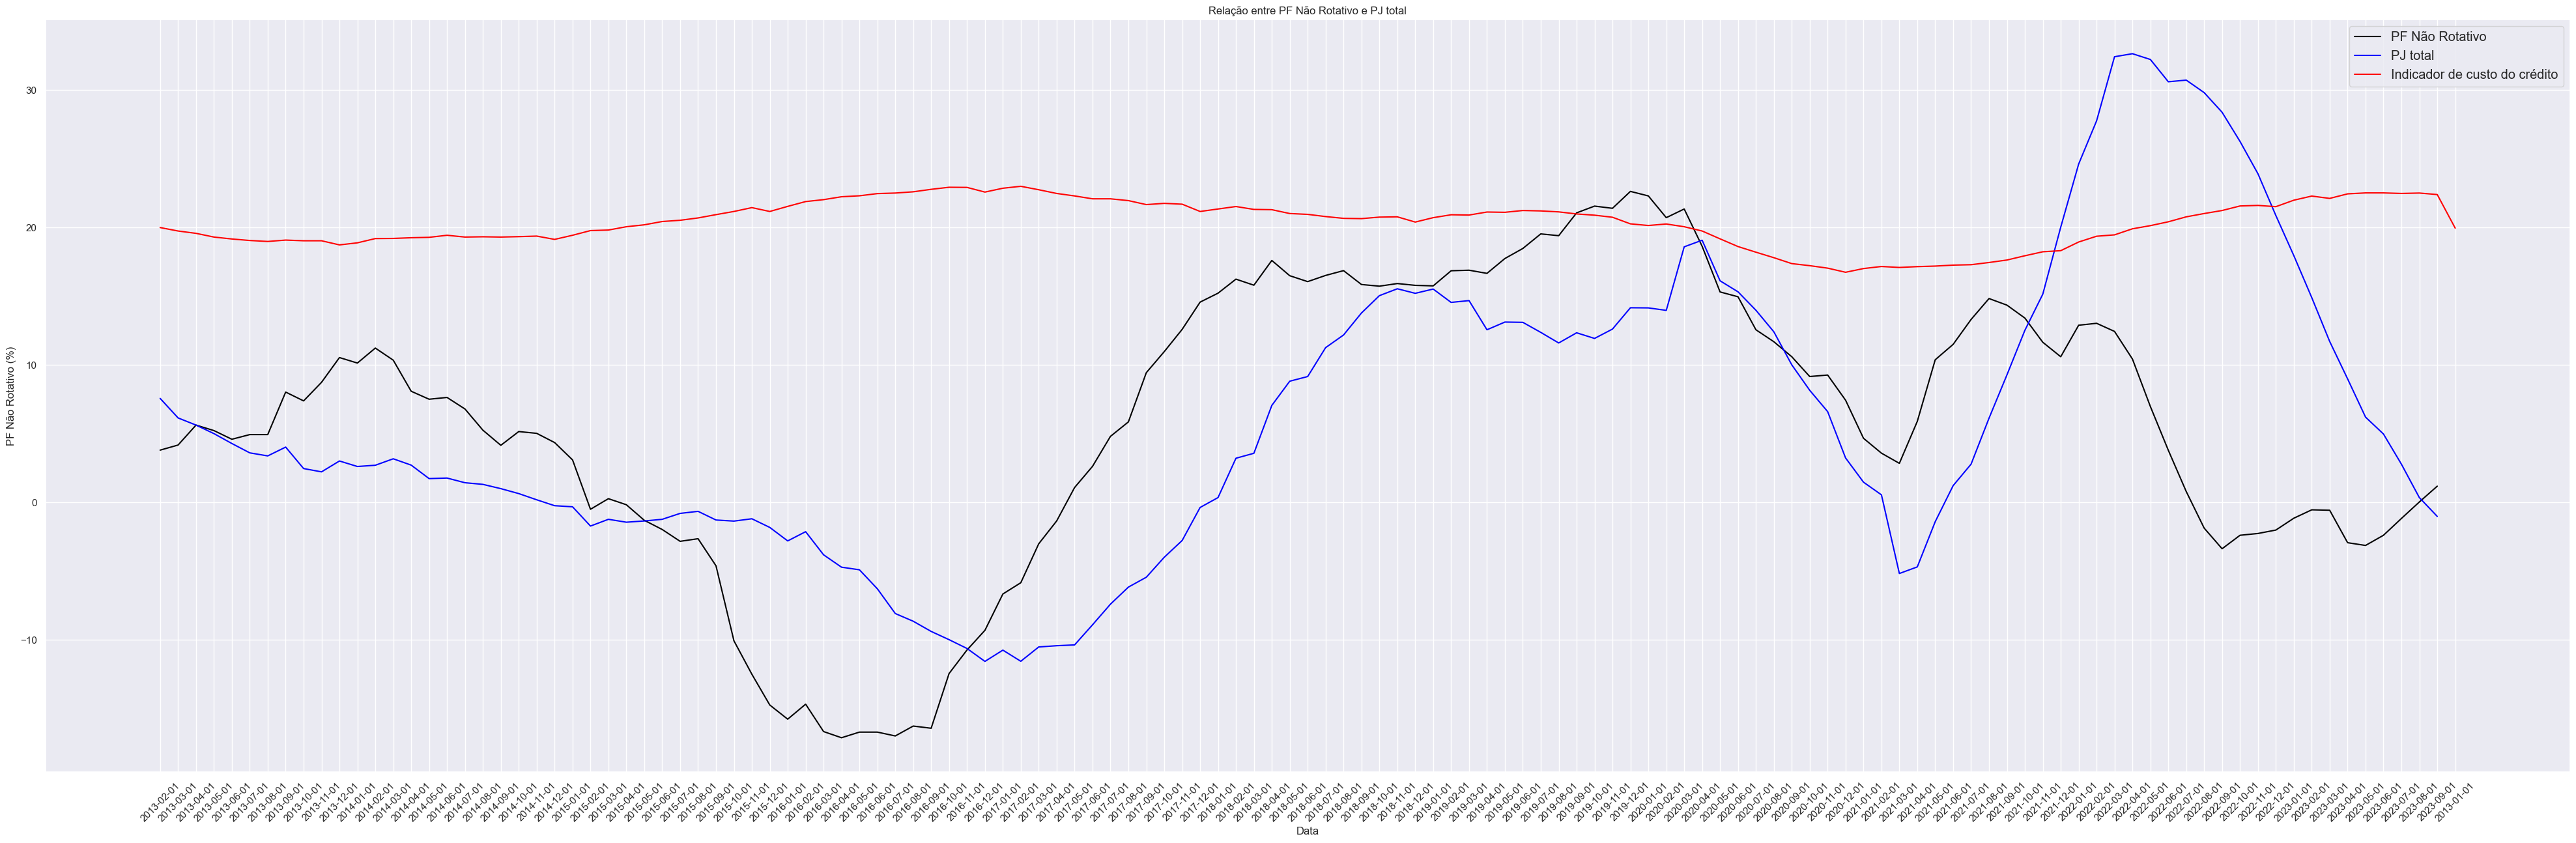

In [24]:
# Define o estilo do gráfico
sns.set(style="darkgrid")

# Cria o gráfico de linha
plt.figure(figsize=(50, 15))

# Plotar a Concessão de crédito PF
sns.lineplot(x=credit_concession['DateTime'], y=credit_concession['PF não rotativo'], label='PF Não Rotativo', color='black')

# Plotar a concessão de crédito PJ
sns.lineplot(x=credit_concession['DateTime'], y=credit_concession['PJ total'], label='PJ total', color='blue')

# Plotar o custo do crédito
sns.lineplot(x=credit_cost['DateTime'], y=credit_cost['Indicador de custo do crédito'], label='Indicador de custo do crédito', color='red')
plt.xticks(rotation=45)

# Adiciona título e rótulos dos eixos
plt.title('Relação entre PF Não Rotativo e PJ total')
plt.xlabel('Data')
plt.ylabel('PF Não Rotativo (%)')

# Adiciona legenda
plt.legend(fontsize='large')

# Exibe o gráfico
plt.show()

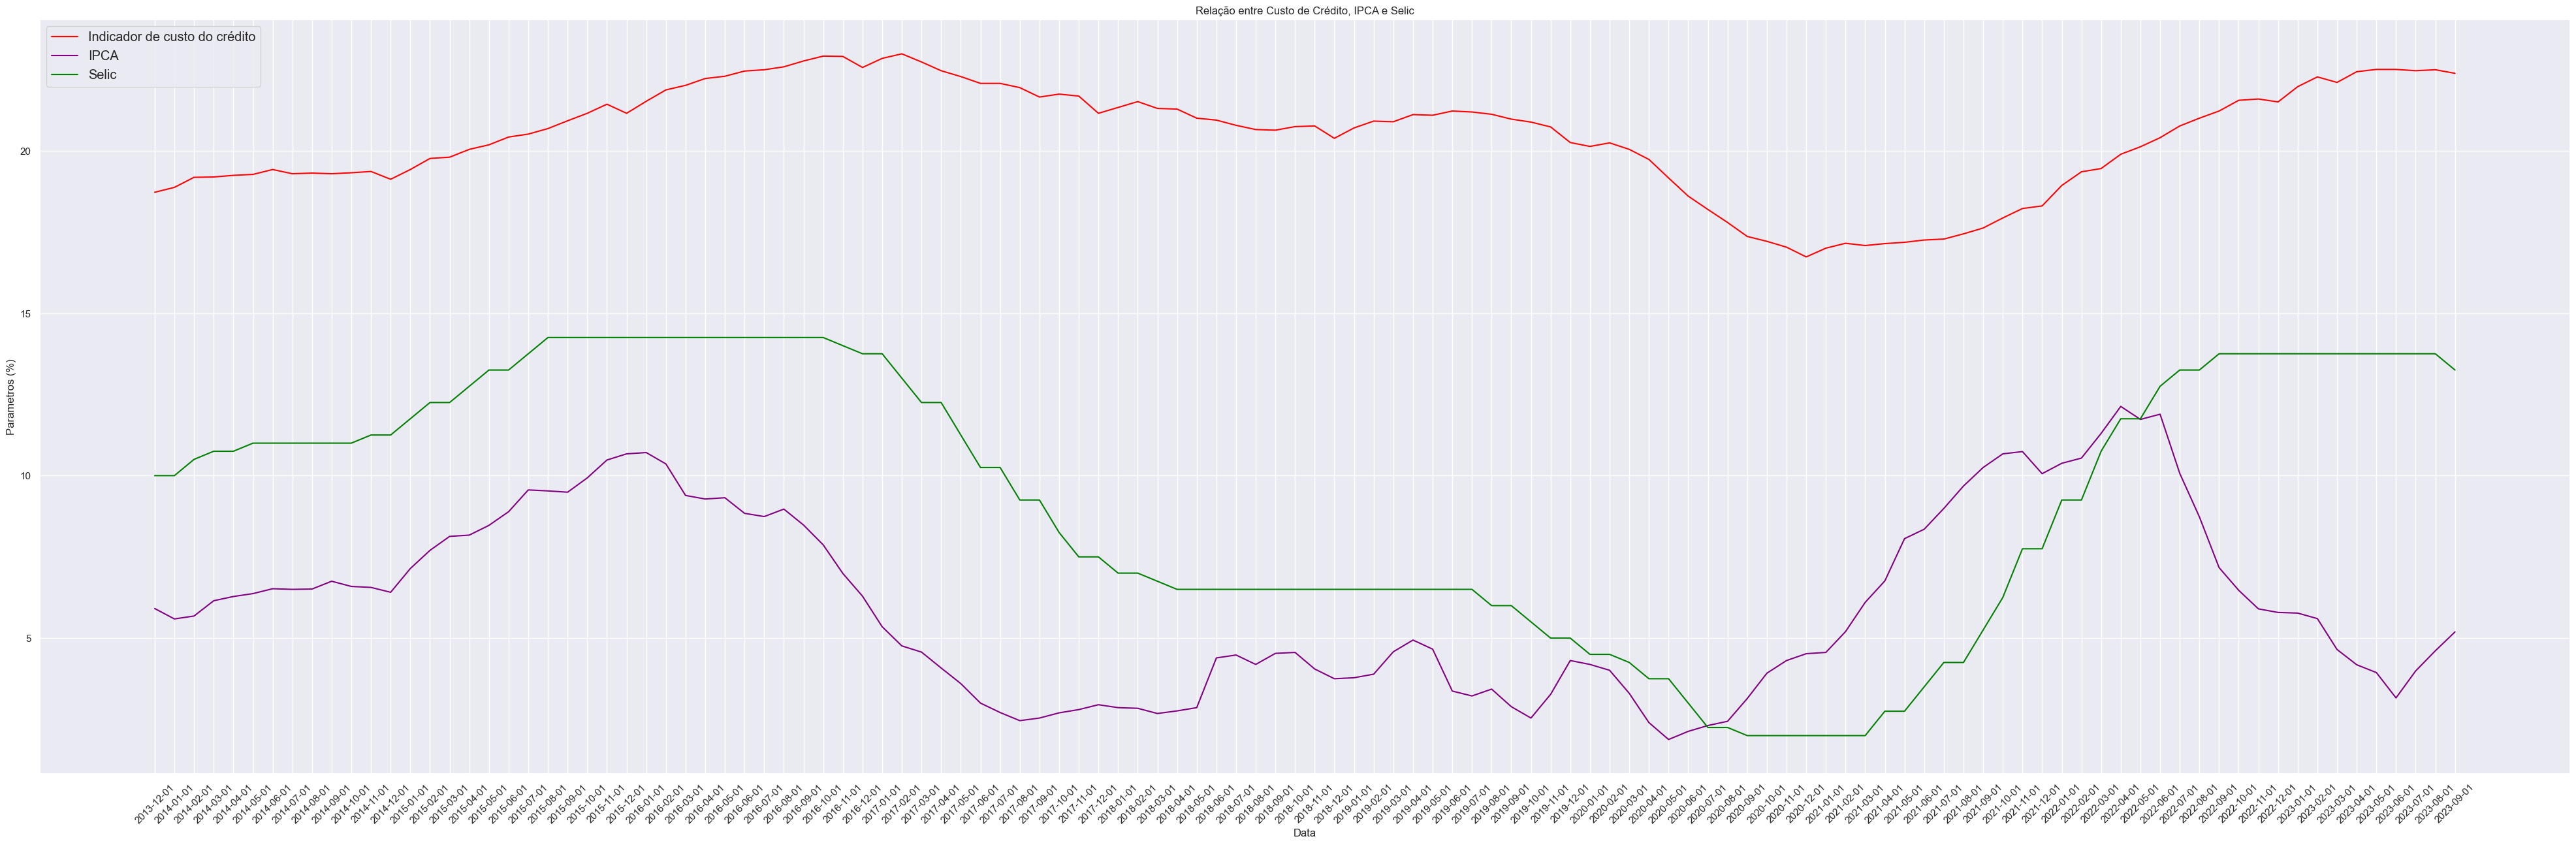

In [40]:
# Define o estilo do gráfico
sns.set(style="darkgrid")

# Cria o gráfico de linha
plt.figure(figsize=(50, 15))

# Plotar o custo de crédito
sns.lineplot(x=credit_cost_ipca_selic['DateTime'], y=credit_cost_ipca_selic['Indicador de custo do crédito'], label='Indicador de custo do crédito', color='red')

# Plotar o IPCA
sns.lineplot(x=credit_cost_ipca_selic['DateTime'], y=credit_cost_ipca_selic['IPCA ocorrido'], label='IPCA', color='purple')

# Plotar a SELIC
sns.lineplot(x=credit_cost_ipca_selic['DateTime'], y=credit_cost_ipca_selic['Selic'], label='Selic', color='green')
plt.xticks(rotation=45)

# Adiciona título e rótulos dos eixos
plt.title('Relação entre Custo de Crédito, IPCA e Selic')
plt.xlabel('Data')
plt.ylabel('Parametros (%)')

# Adiciona legenda
plt.legend(fontsize='large')

# Exibe o gráfico
plt.show()